<a href="https://colab.research.google.com/github/yasmine-juarez/capstone/blob/Yasmine/Latin_America_Regional_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from google.colab import drive
df = pd.read_csv("/content/model_dataset (2).csv", low_memory=False)
features = ['v2x_freexp', 'v2xedvd_me_ctag','v2mecenefm','v2caassemb','v2merange']

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df


,Unnamed: 0_x,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,...,Outgoing_Hindu,Incoming_Hindu,Outgoing_Jew,Incoming_Jew,Outgoing_Muslim,Incoming_Muslim,Outgoing_Other,Incoming_Other,Outgoing_Unaffiliated,Incoming_Unaffiliated
0,171,Mexico,MEX,3,1960,12/31/1960,0,1,United Mexican States,1789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,172,Mexico,MEX,3,1961,12/31/1961,0,1,United Mexican States,1789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,173,Mexico,MEX,3,1962,12/31/1962,0,1,United Mexican States,1789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,174,Mexico,MEX,3,1963,12/31/1963,0,1,United Mexican States,1789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,Mexico,MEX,3,1964,12/31/1964,0,1,United Mexican States,1789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,26328,Zanzibar,ZZB,236,2017,12/31/2017,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10723,26329,Zanzibar,ZZB,236,2018,12/31/2018,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10724,26330,Zanzibar,ZZB,236,2019,12/31/2019,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10725,26331,Zanzibar,ZZB,236,2020,12/31/2020,0,1,"Zanzibar, semi-autonomous region of Tanzania",1856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
df = pd.read_csv("/content/model_dataset (1).csv", low_memory=False)

features = ['v2x_api', 'v2x_libdem', 'v2x_mpi', 'e_lexical_index',
            'v2x_accountability', 'v2x_partipdem', 'v2x_clpol',
            'v2x_veracc', 'v2x_frassoc_thick', 'v2x_delibdem']

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=features)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
df


In [ ]:
# Define regions with all provided countries
regions = {
    "North America": [
        "Canada", "Mexico", "United States of America"
    ],
    "Latin America": [
        "Argentina", "Barbados", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica",
        "Cuba", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala", "Guyana",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay",
        "Peru", "Suriname", "Trinidad and Tobago", "Uruguay", "Venezuela"
    ],
    "Europe": [
        "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
        "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro", "Netherlands",
        "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "Serbia",
        "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom"
    ],
    "Sub-Saharan Africa": [
        "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cape Verde",
        "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo",
        "Djibouti", "Equatorial Guinea", "Eswatini", "Ethiopia", "Gabon", "Ghana",
        "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Mozambique", "Namibia",
        "Niger", "Nigeria", "Republic of the Congo", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Solomon Islands", "Somalia", "Somaliland",
        "South Africa", "South Sudan", "Sudan", "Tanzania", "The Gambia", "Togo",
        "Uganda", "Zambia", "Zimbabwe", "Zanzibar"
    ],
    "Middle East & North Africa (MENA)": [
        "Algeria", "Bahrain", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
        "Lebanon", "Libya", "Morocco", "Oman", "Palestine/Gaza", "Palestine/West Bank",
        "Qatar", "Saudi Arabia", "South Yemen", "Syria", "Tunisia", "Turkey", "United Arab Emirates", "Yemen"
    ],
    "South Asia": [
        "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"
    ],
    "East Asia": [
        "China", "Hong Kong", "Japan", "Mongolia", "North Korea", "South Korea", "Taiwan"
    ],
    "Southeast Asia": [
        "Burma/Myanmar", "Cambodia", "Indonesia", "Laos", "Malaysia", "Philippines",
        "Singapore", "Thailand", "Timor-Leste", "Vietnam"
    ],
    "Oceania": [
        "Australia", "Fiji", "New Zealand", "Papua New Guinea", "Vanuatu"
    ]
}
df['region'] = df['country_name'].apply(lambda country: next((region for region, countries in regions.items() if country in countries), "Unknown"))

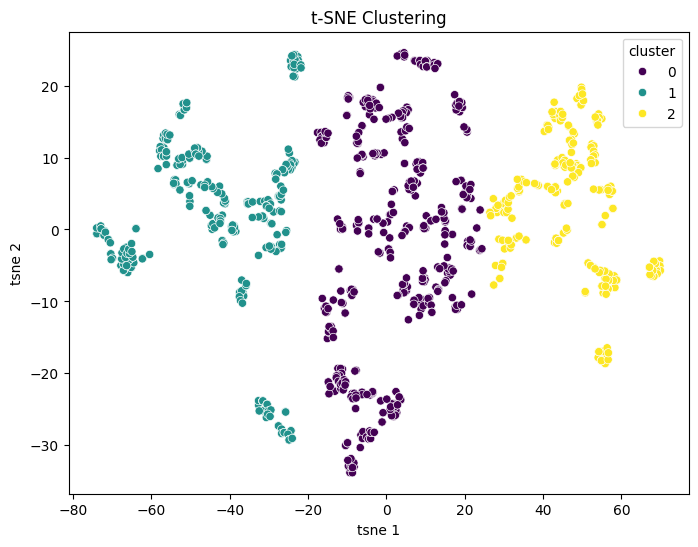

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
np.random.seed(42)

latin_america_df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)
latin_america_df = latin_america_df.reset_index(drop=True)

features = ['v2x_freexp', 'v2xedvd_me_ctag','v2mecenefm','v2caassemb','v2merange']
X_latin_america = latin_america_df[features]
latin_america_df.dropna(subset=features, inplace=True)
X_latin_america = latin_america_df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_latin_america)

scaler = StandardScaler()
X_scaled_latin_america = scaler.fit_transform(X_latin_america)

tsne = TSNE(n_components=2, random_state=42)
X_tsne_latin_america = tsne.fit_transform(X_scaled_latin_america)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_latin_america = kmeans.fit_predict(X_tsne_latin_america)
latin_america_df['cluster'] = clusters_latin_america


latin_america_df['cluster'] = clusters_latin_america
latin_america_df['tsne 1'] = X_tsne_latin_america[:, 0]
latin_america_df['tsne 2'] = X_tsne_latin_america[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=latin_america_df, palette='viridis')
plt.title('t-SNE Clustering')
plt.show()

[[  1.8098902  -2.437966 ]
 [-43.11264     0.9236051]
 [ 47.36015     2.0578103]]


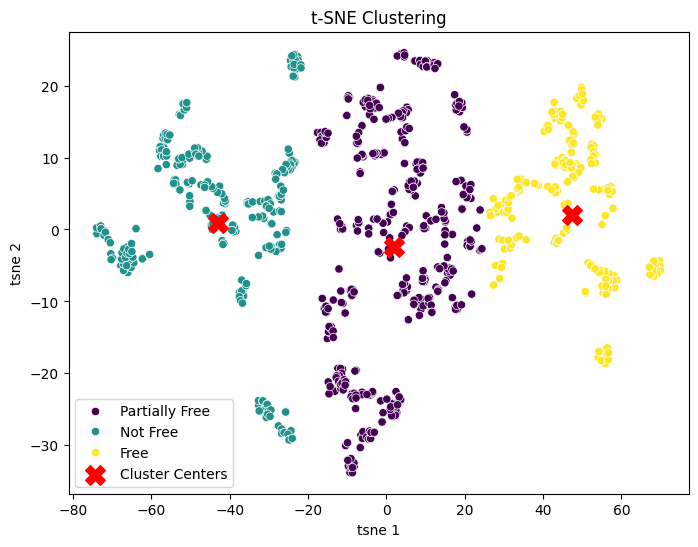

In [ ]:

cluster_centers = kmeans.cluster_centers_


print(cluster_centers)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=latin_america_df, palette='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=200, c='red', label='Cluster Centers')

handles, labels = plt.gca().get_legend_handles_labels()
legend_labels = ['Partially Free', 'Not Free', 'Free', 'Cluster Centers']
plt.legend(handles, legend_labels)

plt.title('t-SNE Clustering')
plt.show()

In [ ]:

cluster_centers = kmeans.cluster_centers_

distances = cdist(X_tsne_latin_america, cluster_centers)

closest_data_point_indices = np.argmin(distances, axis=0)

cluster_country_mapping = {}

for cluster_num, country_index in enumerate(closest_data_point_indices):
    country_name = latin_america_df.iloc[country_index]['country_name']
    cluster_country_mapping[cluster_num] = country_name

for cluster_num, country_name in cluster_country_mapping.items():
    print(f"Cluster {cluster_num}: {country_name}")

Cluster 0: Ecuador
Cluster 1: Peru
Cluster 2: Uruguay


In [ ]:
from scipy.spatial.distance import cdist

centroids = kmeans.cluster_centers_

closest_countries = []
for cluster_id in range(kmeans.n_clusters):
    cluster_data = latin_america_df[latin_america_df['cluster'] == cluster_id]

    distances = cdist(cluster_data[['tsne 1', 'tsne 2']], [centroids[cluster_id]])

    closest_country_index = distances.argmin()

    closest_countries.append(cluster_data.iloc[closest_country_index]['country_name'])

for cluster_id, country in enumerate(closest_countries):
    print(f"Cluster {cluster_id}: Center-most country is {country}")

Cluster 0: Center-most country is Ecuador
Cluster 1: Center-most country is Peru
Cluster 2: Center-most country is Uruguay


In [ ]:
ecuador_index = closest_data_point_indices[0]

ecuador_year = latin_america_df.iloc[ecuador_index]['year']

print(f"The cluster center for cluster 0 (Ecuador) represents the year: {ecuador_year}")


peru_index = closest_data_point_indices[1]

peru_year = latin_america_df.iloc[peru_index]['year']

print(f"The cluster center for cluster 1 (peru) represents the year: {peru_year}")

uruguay_index = closest_data_point_indices[2]

uruguay_year = latin_america_df.iloc[uruguay_index]['year']

print(f"The cluster center for cluster 2 (uruguay) represents the year: {uruguay_year}")

The cluster center for cluster 0 (Ecuador) represents the year: 1988
The cluster center for cluster 1 (peru) represents the year: 1978
The cluster center for cluster 2 (uruguay) represents the year: 2003


In [ ]:
import pandas as pd

latin_america_df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)

countries = ['Ecuador', 'Peru', 'Uruguay', 'Panama']
country_df = latin_america_df[latin_america_df['country_name'].isin(countries)]

selected_data = country_df[['country_name', 'year', 'pred_status'] + ['v2x_freexp', 'v2xedvd_me_ctag', 'v2mecenefm', 'v2caassemb', 'v2merange']]

selected_data.dropna(subset=['v2x_freexp', 'v2xedvd_me_ctag', 'v2mecenefm', 'v2caassemb', 'v2merange', 'pred_status'], inplace=True)

def count_pred_status(df):
    status_counts = df['pred_status'].value_counts().to_dict()
    return status_counts
status_counts_by_country = selected_data.groupby('country_name').apply(count_pred_status)
for country, counts in status_counts_by_country.items():
    print(f"\n--- {country} ---")
    total_years = sum(counts.values())
    for status, count in counts.items():
        percentage = (count / total_years) * 100
        print(f"  Status {status}: {count} years ({percentage:.2f}%)")


--- Ecuador ---
  Status 2.0: 43 years (69.35%)
  Status 1.0: 19 years (30.65%)

--- Peru ---
  Status 1.0: 30 years (48.39%)
  Status 2.0: 26 years (41.94%)
  Status 3.0: 6 years (9.68%)

--- Uruguay ---
  Status 1.0: 47 years (75.81%)
  Status 2.0: 11 years (17.74%)
  Status 3.0: 4 years (6.45%)


<ipython-input-17-2a70b786dd56>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.dropna(subset=['v2x_freexp', 'v2xedvd_me_ctag', 'v2mecenefm', 'v2caassemb', 'v2merange', 'pred_status'], inplace=True)
<ipython-input-17-2a70b786dd56>:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  status_counts_by_country = selected_data.groupby('country_name').apply(count_pred_status)


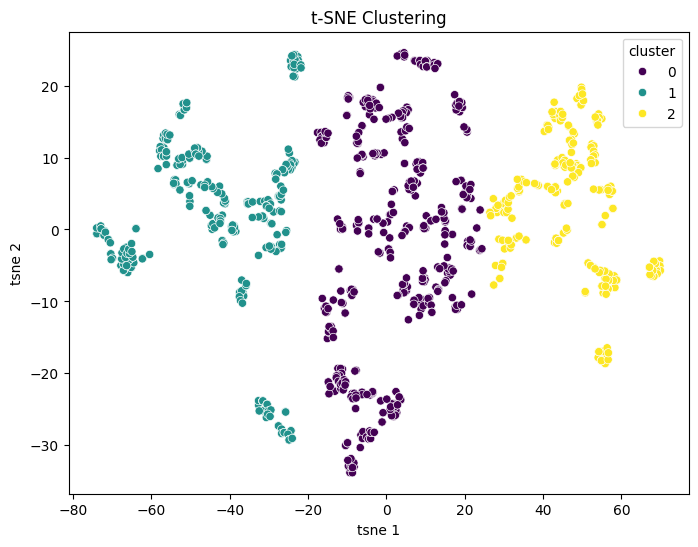


External Cluster Validation Metrics:
Adjusted Rand Index (ARI): 0.243
Normalized Mutual Information (NMI): 0.329


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from scipy.spatial.distance import cdist
from google.colab import drive
np.random.seed(42)

latin_america_df = pd.read_csv("/content/latinamericadata.csv", low_memory=False)
latin_america_df = latin_america_df.reset_index(drop=True)
features = ['v2x_freexp', 'v2xedvd_me_ctag','v2mecenefm','v2caassemb','v2merange']
latin_america_df.dropna(subset=features, inplace=True) # Drop rows with missing values
X_latin_america = latin_america_df[features] # Select features for clustering

scaler = StandardScaler()
X_scaled_latin_america = scaler.fit_transform(X_latin_america)

tsne = TSNE(n_components=2, random_state=42)
X_tsne_latin_america = tsne.fit_transform(X_scaled_latin_america)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_latin_america = kmeans.fit_predict(X_tsne_latin_america)

latin_america_df['cluster'] = clusters_latin_america

latin_america_df['tsne 1'] = X_tsne_latin_america[:, 0]
latin_america_df['tsne 2'] = X_tsne_latin_america[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne 1', y='tsne 2', hue='cluster', data=latin_america_df, palette='viridis')
plt.title('t-SNE Clustering')
plt.show()

ari = adjusted_rand_score(latin_america_df['pred_status'], latin_america_df['cluster'])
nmi = normalized_mutual_info_score(latin_america_df['pred_status'], latin_america_df['cluster'])

print("\nExternal Cluster Validation Metrics:")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
X_tsne_latin_america = tsne.fit_transform(X_scaled_latin_america)

latin_america_df['cluster'] = clusters_latin_america
latin_america_df['tsne 1'] = X_tsne_latin_america[:, 0]
latin_america_df['tsne 2'] = X_tsne_latin_america[:, 1]
latin_america_df['tsne 3'] = X_tsne_latin_america[:, 2]

fig = px.scatter_3d(
    latin_america_df,
    x='tsne 1',
    y='tsne 2',
    z='tsne 3',
    color='cluster',
    hover_name='country_name',
    title='Interactive 3D t-SNE Clustering of Latin American Countries',
    labels={'tsne 1': 't-SNE Dimension 1', 'tsne 2': 't-SNE Dimension 2', 'tsne 3': 't-SNE Dimension 3'},
)
fig.show()